<img width="800px" src="./img/OpenClassroom_LOGO.png"></img>
# <!-- TITLE --> [P08] -  App Dating / Prédiction des Likes
<!-- DESC --> Episode 4 : Visualisation & Synthèse
<!-- AUTHOR : Philippe HOTON (OpenClassRooms) -->


## Objectif :
 - Synthèse

Savoir si une personne plaît à une autre dépend de plusieurs facteurs :
la présentation textuelle, les goûts, la personnalité, les valeurs présentés 
les photos du profil, le visage, la silhouette,  la tenue vestimentaire, le décor, l’entourage, qui donnent une idée dans quel milieu social, la personne évolue etc
Ici, nous allons nous  concentrer uniquement sur le visage.

## ce que nous allons faire :

 - Regroupement des résultats des modèles entrainés pour chaque persona

In [1]:
# Chargement des modules 
from sklearn.model_selection import train_test_split
from functions import *
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
import matplotlib
import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

UPLOAD_FOLDER = './uploads'

#personas_likes= [ {},{},{},{},{} ]
#pickle.dump(personas_likes, open("./save/personas_likes.pkl", "wb"))
std_scale = pickle.load(open("./save/kmeans_12.pkl", "rb"))

std_scale=pickle.load( open("./save/std_scale.pkl", "rb"))
pca= pickle.load(open("./save/pca.pkl", "rb")) 
data_sortie=pickle.load( open("./save/data_sortie.pkl", "rb"))
names=["./thumbs/img"+str(i)+".png" for i in range(len(data_sortie)+1)]
X_std=pickle.load( open("./save/X_std.pkl", "rb"))
personas_likes= pickle.load( open("./web_app/save/personas_likes.pkl", "rb"))
labels_={}
centers_={}
kms_={}
for iclusters in [12,24,48]:
    labels_[iclusters]=pickle.load( open("./save/labels_"+  str(iclusters)+".pkl", "rb"))
    centers_[iclusters]=pickle.load( open("./save/centers_"+  str(iclusters)+".pkl", "rb"))
    kms_[iclusters]=pickle.load( open("./save/kmeans_"+  str(iclusters)+".pkl", "rb"))

In [7]:
personas =[
   
     {"name":"Peter","img":567, "age":"23","criterias":"Aime les jeunes femmes blondes."},
         {"name":"Sophie","img":484, "age":"25","criterias":"Aime les hommes bruns avec de la barbe."},
   {  "name":"John","img":1415, "age":"48","criterias":"Aime les femmes d'origine asiatique pas trop jeunes."},
    {"name":"Carmelle","img":1081, "age":"27","criterias":"Aime les hommes à la peau mate ou foncée."},

]    

reports={}

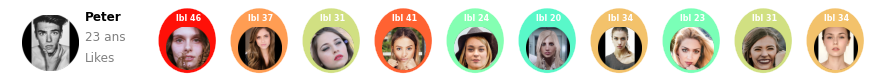

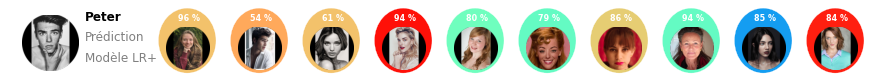

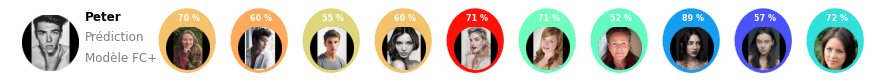

---------------------


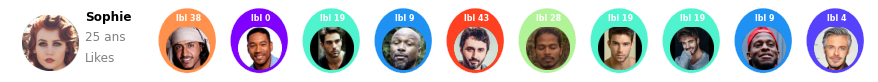

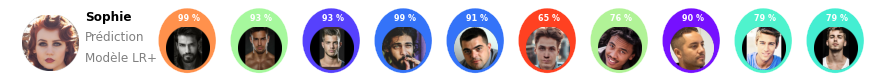

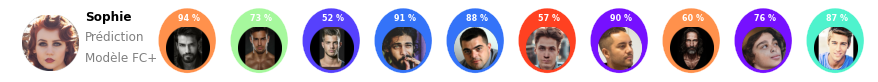

---------------------


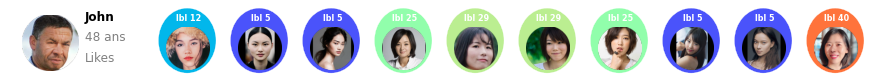

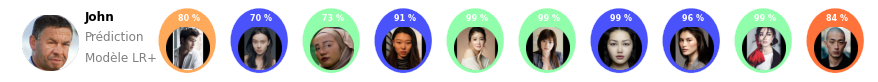

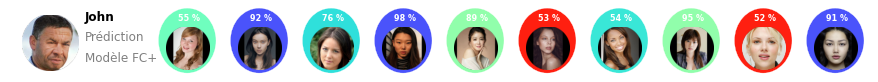

---------------------


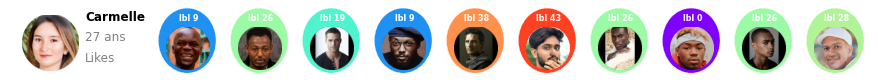

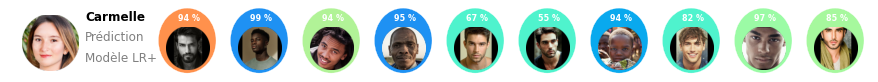

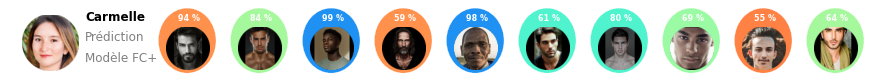

---------------------


In [8]:
for PERSONA,p in enumerate(personas):
    clr=pickle.load(open("./save/model_reglog_augmented_"+str(PERSONA) +".pkl", 'rb'))
    reports[PERSONA]= pickle.load(open("./save/reports_"+str(PERSONA) +".pkl", 'rb'))
    model= keras.models.load_model('./save/model_fc_augmented_' +str( PERSONA))
    all_predict=  model.predict(data_sortie)
    likes_dnn=[]
    perc_dnn=[]
    for i,r in enumerate(all_predict):
        if r>0.5:
            likes_dnn.append(i)
            perc_dnn.append( int(100*r) )
    all_predict= clr.predict_proba(data_sortie)[:,1]
    likes_logreg=[]
    perc_logreg=[]
    for i,r in enumerate(all_predict):
        if r>0.5:
            likes_logreg.append(i)
            perc_logreg.append( int(100*r) )

    show_persona(personas[PERSONA],personas_likes[PERSONA]   ,names,labels_[48])
    show_predict_like(personas[PERSONA],"Modèle LR+",likes_logreg,perc_logreg,names,labels_[48])
    show_predict_like(personas[PERSONA],"Modèle FC+",likes_dnn,perc_dnn,names,labels_[48])
    print("---------------------")

In [16]:
reports[0]['LR'].split("\n")[2].split()

['Unlike', '0.97', '0.93', '0.95', '95']

In [17]:
float( '0.97')

0.97

In [55]:
 d= { "profile":[],"method":[], "like":[],"precision":[],"recall":[],"f1-score":[],"support":[] }
df_reports = pd.DataFrame(d) 
for profile in reports:
    for method in reports[profile]:
        ls=[ reports[profile][method].split("\n")[2].split(), reports[profile][method].split("\n")[3].split()  ]
        for params in ls:
            d= { "profile":int(profile),"method":method, "like":params[0],"precision":float(params[1]),"recall":float(params[2]),"f1-score":float(params[3]),"support":float(params[4]) }
            df_reports=df_reports.append(d,ignore_index=True)
df_reports

,profile,method,like,precision,recall,f1-score,support
0,0.0,LR,Unlike,0.97,0.93,0.95,95.0
1,0.0,LR,Like,0.36,0.57,0.44,7.0
2,0.0,FC,Unlike,0.99,0.87,0.92,76.0
3,0.0,FC,Like,0.29,0.80,0.42,5.0
4,0.0,LR+,Unlike,0.87,0.77,0.82,92.0
5,0.0,LR+,Like,0.74,0.85,0.79,71.0
6,0.0,FC+,Unlike,0.78,0.89,0.83,71.0
7,0.0,FC+,Like,0.84,0.70,0.76,60.0
8,1.0,LR,Unlike,0.97,0.94,0.96,68.0
9,1.0,LR,Like,0.71,0.83,0.77,12.0


In [86]:
import numpy as np
import matplotlib.pyplot as plt



def barplot(title,values,field,grouplabels,valuelabels):
    fig, ax = plt.subplots(figsize=(10,4))
    colors=cm.rainbow(np.linspace(0,1,len(values)))
    ax.grid(axis='y')
    barWidth = 1/(len(values)+1)
    r1 = np.arange(len(values[0])) 
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
    for i,bars in enumerate(values):
        # set heights of bars
        # Make the plot
        #print(bars[field])
        plt.bar(r1, bars[field], color=colors[i], width=barWidth, edgecolor='white', label=valuelabels[i])
        r1 = [x + barWidth for x in r1]
 
    # Add xticks on the middle of the group bars
    plt.xlabel('Personas', fontweight='bold')
    plt.ylabel(field+ " (%)", fontweight='bold')
    #plt.xticks([r + barWidth for r in range(len(bars))],grouplabels )
    plt.legend()
    plt.title(title)
    for i,persona in enumerate(personas):
        show_img(fig,names[persona["img"]+1 ],0.2+0.75*i/4,0,0.1,0.1)
    # Create legend & Show graphic

    plt.show()

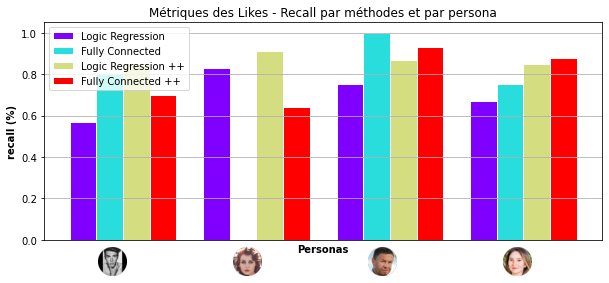

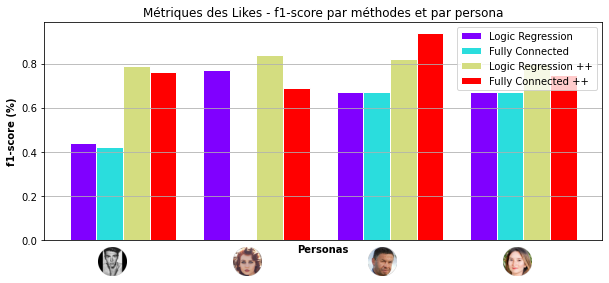

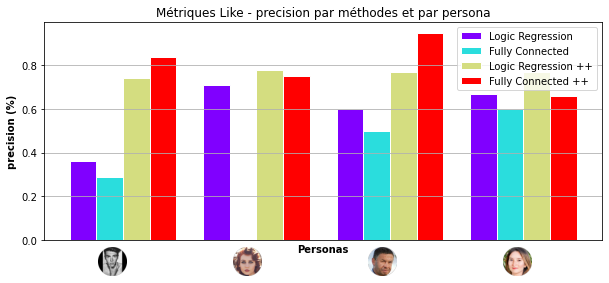

In [87]:
methods= ["LR","FC","LR+","FC+"]
methods_name = ["Logic Regression","Fully Connected","Logic Regression ++","Fully Connected ++" ]
barplot("Métriques des Likes - Recall par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"recall",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)

barplot("Métriques des Likes - f1-score par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"f1-score",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)

barplot("Métriques Like - precision par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"precision",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)

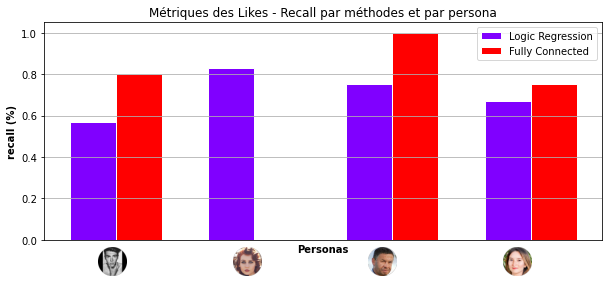

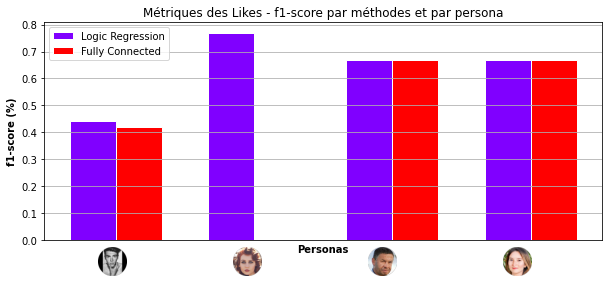

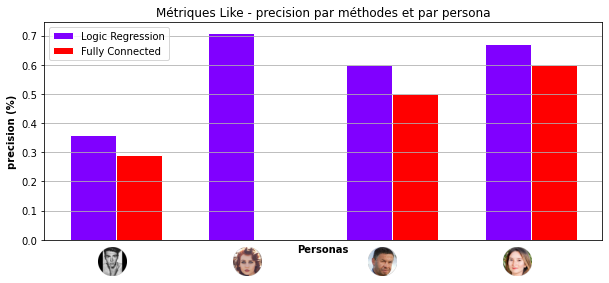

In [88]:
methods= ["LR","FC"]
methods_name = ["Logic Regression","Fully Connected" ]
barplot("Métriques des Likes - Recall par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"recall",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)

barplot("Métriques des Likes - f1-score par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"f1-score",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)

barplot("Métriques Like - precision par méthodes et par persona",
        [
        df_reports[(df_reports["method"]==meth) & (df_reports["like"]=="Like") ] for meth in methods ],"precision",['Peter', 'Sophie', 'John', 'Carmelle'],methods_name)